In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from pathlib import Path
#memanggil data set lewat gdrive
Path = "/content/gdrive/MyDrive/Praktikum_ML/Praktikum6/data"

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
df = pd.read_csv(Path + '/secondary_data.csv', sep=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [64]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


# Pisahkan fitur dan target

In [68]:
X = df[['cap-diameter', 'stem-height']]
y = df['class']

In [69]:
# Pilih kolom numerik (tidak di-encode)
X = df[['cap-diameter', 'stem-height']]

# Encode target (karena isinya huruf p/e)
le = LabelEncoder()
y = le.fit_transform(df['class'])

In [70]:
X.head()

,cap-diameter,stem-height
0,15.26,16.95
1,16.60,17.99
2,14.07,17.80
3,14.17,15.77
4,14.64,16.53


In [71]:
y = pd.Series(le.fit_transform(y), name='class')
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


# Split dan Bangun Model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

SVC(C=1)

# Evaluasi dan Report Klasifikasi

In [31]:
y_pred = model.predict(X_test)

# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Laporan Klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 99.48%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5374
           1       1.00      1.00      1.00      6840

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



# Confusion Matrix


Confusion Matrix:
 [[2825 2549]
 [1667 5173]]


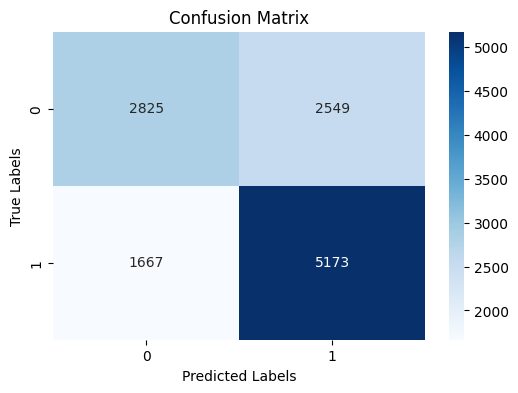

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Jika kamu tahu nama kelas (opsional, agar lebih informatif)
# misalnya: class_names = ['Negatif', 'Positif']
# maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualisasi Hasil Model SVM

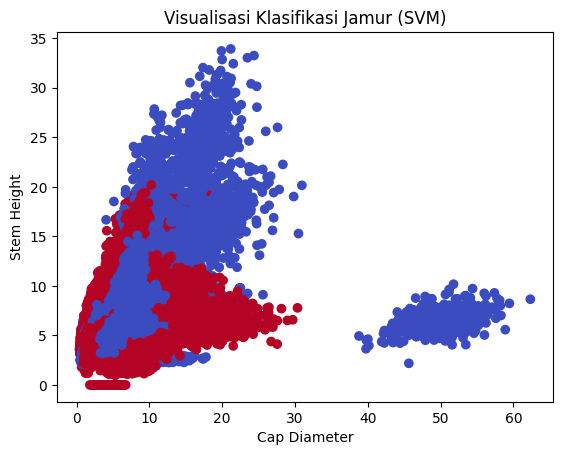

In [81]:
import matplotlib.pyplot as plt

plt.scatter(df['cap-diameter'], df['stem-height'], c=y, cmap='coolwarm')
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Height')
plt.title('Visualisasi Klasifikasi Jamur (SVM)')
plt.show()

# 3D Visualisasi Hasil Model SVM

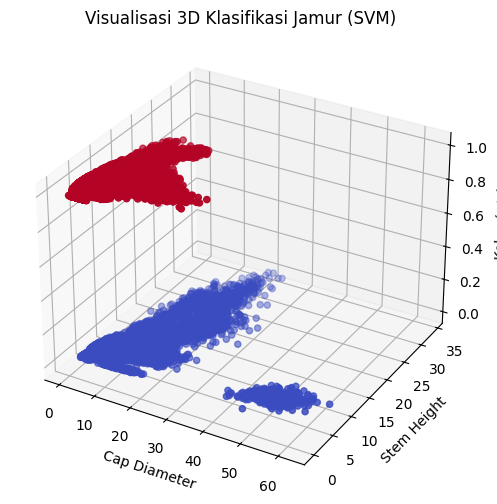

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['cap-diameter'], df['stem-height'], y, c=y, cmap='coolwarm')
ax.set_xlabel('Cap Diameter')
ax.set_ylabel('Stem Height')
ax.set_zlabel('Kelas (e/p)')
ax.set_title('Visualisasi 3D Klasifikasi Jamur (SVM)')
plt.show()
